In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import warnings

In [2]:
# Creating DataFrames and removing index created during feature_engineering export
X_df = pd.read_csv("/workspace/anomaly_lte/data/x_test_processed_ft2.csv")
Y_df = pd.read_csv("/workspace/anomaly_lte/data/Y_test.csv")

X_df = X_df.iloc[:,1:]
Y_df = Y_df.iloc[:,1:]

In [3]:
# Obtaining models
with open('models/train_dtree_ft2.pkl', 'rb') as model_file:
    dtree = pickle.load(model_file)

with open('models/train_xgboost_ft2.pkl', 'rb') as model_file:
    xgboost = pickle.load(model_file)

Score for Decision Tree model: 0.9649099038070722

Classification Report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5346
           1       0.97      0.90      0.93      2035

    accuracy                           0.96      7381
   macro avg       0.97      0.94      0.95      7381
weighted avg       0.97      0.96      0.96      7381


Confusion Matrix for Decision Tree model: 
[[5294   52]
 [ 207 1828]]


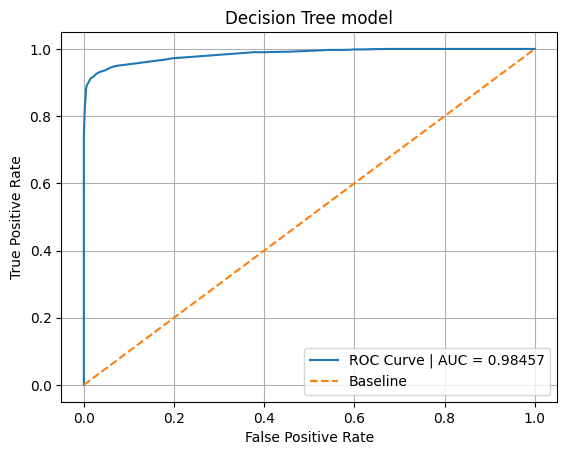

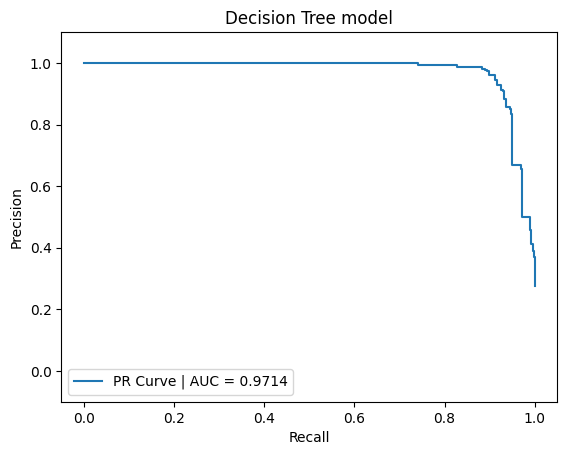

In [4]:
# Evaluating metrics for decision tree
predicted_probability = dtree.predict_proba(X_df)[:,1]
predicted_outcome = dtree.predict(X_df)

# Printing Score
score = dtree.score(X_df, Y_df)
print(f"Score for Decision Tree model: {score}")

# Printing Classification Report
cr = classification_report(Y_df, predicted_outcome)   
print(f"\nClassification Report for Decision Tree model:\n{cr}")

# Printing Confusion Matrix
cm = confusion_matrix(Y_df, predicted_outcome)
print(f"\nConfusion Matrix for Decision Tree model: \n{cm}")

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Getting PRD and AUC
precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
prd_auc = average_precision_score(Y_df, predicted_probability)

# Plotting ROC Curve
plt.plot(false_positive_rate, true_positive_rate, label = f"ROC Curve | AUC = {round(roc_auc,5)}")
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.title("Decision Tree model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

# Plotting Precision Recall Display
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(label = f"PR Curve | AUC = {round(prd_auc,5)}")
plt.title("Decision Tree model")
plt.ylim(-0.1,1.1)
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Score for xgboost model: 0.9833355913832814

Classification Report for xgboost model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5346
           1       1.00      0.94      0.97      2035

    accuracy                           0.98      7381
   macro avg       0.99      0.97      0.98      7381
weighted avg       0.98      0.98      0.98      7381


Confusion Matrix for xgboost model: 
[[5342    4]
 [ 119 1916]]


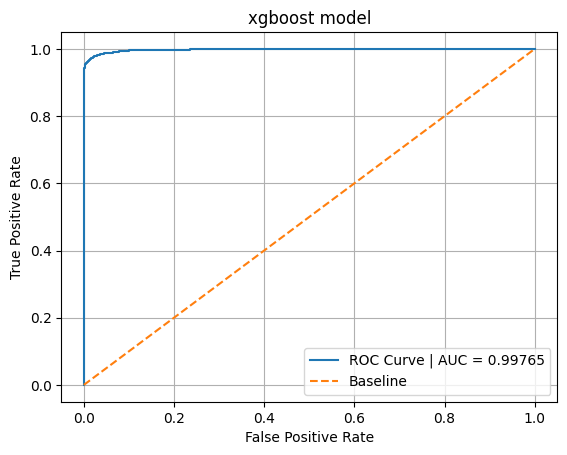

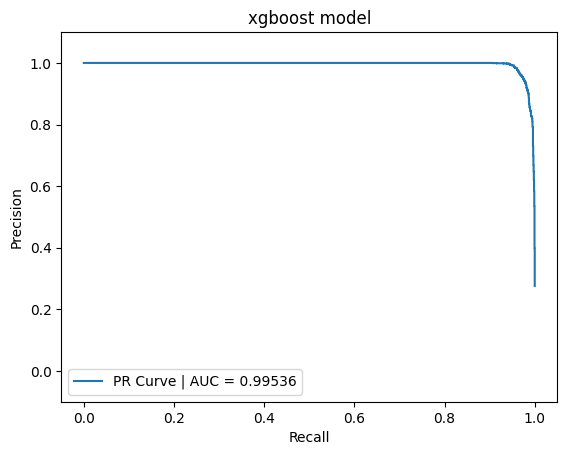

In [5]:
# Evaluating metrics for xgboost
predicted_probability = xgboost.predict_proba(X_df)[:,1]
predicted_outcome = xgboost.predict(X_df)

# Printing Score
score = xgboost.score(X_df, Y_df)
print(f"Score for xgboost model: {score}")

# Printing Classification Report
cr = classification_report(Y_df, predicted_outcome)   
print(f"\nClassification Report for xgboost model:\n{cr}")

# Printing Confusion Matrix
cm = confusion_matrix(Y_df, predicted_outcome)
print(f"\nConfusion Matrix for xgboost model: \n{cm}")

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Getting PRD and AUC
precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
prd_auc = average_precision_score(Y_df, predicted_probability)

# Plotting ROC Curve
plt.plot(false_positive_rate, true_positive_rate, label = f"ROC Curve | AUC = {round(roc_auc,5)}")
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.title("xgboost model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

# Plotting Precision Recall Display
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(label = f"PR Curve | AUC = {round(prd_auc,5)}")
plt.title("xgboost model")
plt.ylim(-0.1,1.1)
plt.show()

# Removing warning displays for xgboost
warnings.filterwarnings('ignore')

Score for Decision Tree model: 0.9649099038070722

Classification Report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5346
           1       0.97      0.90      0.93      2035

    accuracy                           0.96      7381
   macro avg       0.97      0.94      0.95      7381
weighted avg       0.97      0.96      0.96      7381


Confusion Matrix for Decision Tree model: 
[[5294   52]
 [ 207 1828]]


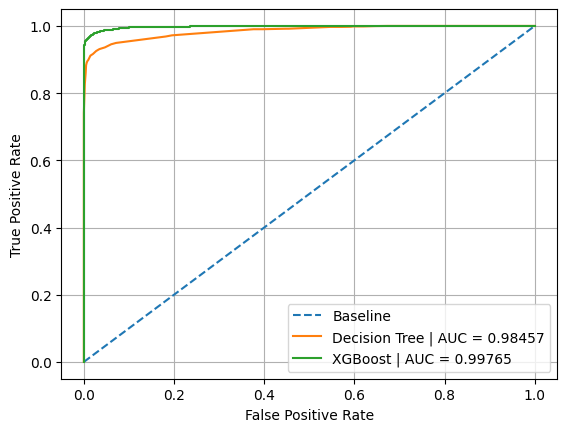

In [6]:
# Evaluating metrics for decision tree
predicted_probability = dtree.predict_proba(X_df)[:,1]
predicted_outcome = dtree.predict(X_df)

predicted_probability_2 = xgboost.predict_proba(X_df)[:,1]
predicted_outcome_2 = xgboost.predict(X_df)

# Printing Score
score = dtree.score(X_df, Y_df)
print(f"Score for Decision Tree model: {score}")

# Printing Classification Report
cr = classification_report(Y_df, predicted_outcome)   
print(f"\nClassification Report for Decision Tree model:\n{cr}")

# Printing Confusion Matrix
cm = confusion_matrix(Y_df, predicted_outcome)
print(f"\nConfusion Matrix for Decision Tree model: \n{cm}")

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

false_positive_rate2, true_positive_rate2, roc_thresholds2 = roc_curve(Y_df, predicted_probability_2)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

# Plotting ROC Curve
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.plot(false_positive_rate, true_positive_rate, label = f"Decision Tree | AUC = {round(roc_auc,5)}")
plt.plot(false_positive_rate2, true_positive_rate2, label = f"XGBoost | AUC = {round(roc_auc2,5)}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()
